<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Create a classification model to predict High/Low salary. 


#### Model based on location:

- Start by ONLY using the location as a feature. 
- Use logistic regression with both statsmodels and sklearn.
- Use a further classifier you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.


#### Load in the the data of scraped salaries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_readin = pd.read_csv('./results.csv')
df_readin.head()

Unnamed: 0                                         Jobtitle  \
0           1                 Graduate Environmental Scientist   
1           9               Environmental Scientist Specialist   
2          20                        Data Scientist/ Python, R   
3          30                                   Data Scientist   
4          33  Data Scientist/Analyst (R, Python,Google Cloud)   

           Location  Salary                Company        Cities  USDSalary  
0  Philadelphia, PA   47783   City of Philadelphia  Philadelphia    47783.0  
1  Philadelphia, PA   56589   City of Philadelphia  Philadelphia    56589.0  
2   Bala-Cynwyd, PA  110000  Workbridge Associates  Philadelphia   110000.0  
3  Philadelphia, PA   90000     Jobspring Partners  Philadelphia    90000.0  
4  Philadelphia, PA   90000  Workbridge Associates  Philadelphia    90000.0

In [3]:
df = df_readin.drop('Unnamed: 0', axis=1)
df.head()

Jobtitle          Location  Salary  \
0                 Graduate Environmental Scientist  Philadelphia, PA   47783   
1               Environmental Scientist Specialist  Philadelphia, PA   56589   
2                        Data Scientist/ Python, R   Bala-Cynwyd, PA  110000   
3                                   Data Scientist  Philadelphia, PA   90000   
4  Data Scientist/Analyst (R, Python,Google Cloud)  Philadelphia, PA   90000   

                 Company        Cities  USDSalary  
0   City of Philadelphia  Philadelphia    47783.0  
1   City of Philadelphia  Philadelphia    56589.0  
2  Workbridge Associates  Philadelphia   110000.0  
3     Jobspring Partners  Philadelphia    90000.0  
4  Workbridge Associates  Philadelphia    90000.0

In [4]:
df.shape

(905, 6)

#### Computing the median salary and create a new binary variable that is true when the salary is high (above the median).

We want to predict a binary variable - whether the salary was low or high.

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. 

In [5]:
df.USDSalary.median()

80000.0

In [6]:
low_salary = df[df['USDSalary'] < df.USDSalary.median()]
high_salary = df[df['USDSalary'] > df.USDSalary.median()]

In [7]:
low_salary.describe()

Salary     USDSalary
count    450.000000    450.000000
mean   50962.248889  56765.169867
std    15079.731919  14552.867443
min    10000.000000  12800.000000
25%    40000.000000  45223.680000
50%    50000.000000  57600.000000
75%    60000.000000  70286.000000
max    79000.000000  79000.000000

In [8]:
high_salary.describe()

Salary      USDSalary
count     441.000000     441.000000
mean   105598.895692  110033.577596
std     28088.154352   25228.026477
min     65000.000000   80500.000000
25%     88000.000000   92000.000000
50%    100000.000000  102400.000000
75%    118000.000000  120000.000000
max    200000.000000  200000.000000

In [9]:
y = df.USDSalary.map(lambda x: 1 if x < df.USDSalary.median() else 0)

#### Thought experiment: What is the baseline accuracy for this model?

baseline_accuracy = majority_class_N / total_N

In [10]:
y.value_counts(normalize=True)

0    0.502762
1    0.497238
Name: USDSalary, dtype: float64

In [11]:
print('baseline:', y.value_counts(normalize=True).max())

baseline: 0.5027624309392266


## Modeling based on location

In [12]:
#Use logistic regression with both statsmodels and sklearn.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.formula.api as smf

In [14]:
#Transforming the classifier to dummy variable.
cities_dum = pd.get_dummies(df.Cities)
cities_dum.head(2)

Atlanta  Austin  Boston  Chicago  Dallas  Denver  Houston  \
0        0       0       0        0       0       0        0   
1        0       0       0        0       0       0        0   

   London, Greater London  Los+Angeles  Miami  New+York  Philadelphia  \
0                       0            0      0         0             1   
1                       0            0      0         0             1   

   Phoenix  Pittsburgh  Portland  San Jose, CA  San+Francisco  Seattle  \
0        0           0         0             0              0        0   
1        0           0         0             0              0        0   

   Washington  Washington, DC  
0           0               0  
1           0               0

In [15]:
X = cities_dum

In [16]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: USDSalary, dtype: int64

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10)
print(scores)
print(np.mean(scores))

[0.50549451 0.04395604 0.12087912 0.45054945 0.15384615 0.47777778
 0.64444444 0.63333333 0.5        0.5       ]
0.403028083028083


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#Xt_train = scaler.fit_transform(X_train)
#Xt_test = scaler.transform(X_test)

In [21]:
#logreg = LogisticRegression()
#logreg.fit(X, y)

In [22]:
print(logreg.fit(X_train, y_train))
print(logreg.predict(X_test))
#print(logreg.predict_proba(X_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1]


In [23]:
# model score 
logreg.score(X,y)

0.7005524861878453

In [24]:
logreg.score(X_train,y_train)

0.6947513812154696

In [25]:
# model score after cross_validation
logreg.score(X_test,y_test)

0.7237569060773481

In [26]:
model = LogisticRegressionCV()

In [27]:
# setup the grid search
params = {'penalty':['l1','l2'],
          'Cs': [np.logspace(-4,4,10)],
          'fit_intercept':[True,False],
          'solver':['liblinear']}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train,y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test,y_test))
#print('Best estimator coefficients:')
#print(gs.best_estimator_.coef_)

Best Parameters:
{'Cs': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]), 'fit_intercept': False, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator C:
[0.35938137]
Best estimator mean cross validated training score:
0.6795580110497238
Best estimator score on the full training set:
0.6850828729281768
Best estimator score on the test set:
0.7071823204419889


In [28]:
#Use a further classifier you find suitable.

In [29]:
#Transforming the classifier to dummy variable.
title_city_dum = pd.get_dummies(df[['Jobtitle', 'Cities']])
title_city_dum.head(2)

Jobtitle_018 Data / ETL Engineer II  \
0                                    0   
1                                    0   

   Jobtitle_3 x Research Fellow (Machine Learning)  \
0                                                0   
1                                                0   

   Jobtitle_919-AP-10564446-EXT - Epidemiologist  \
0                                              0   
1                                              0   

   Jobtitle_919-AP-1333932-EXT - Senior HIV/STI Surveillance and Prevent...  \
0                                                  0                          
1                                                  0                          

   Jobtitle_ABS/CLO Research Analyst  Jobtitle_AI Data Scientist  \
0                                  0                           0   
1                                  0                           0   

   Jobtitle_AI Labs - 30 x Data Scientist / Machine Learning Engineer (a...  \
0                                                  0                          
1                                                  0                          

   Jobtitle_AWS DevOps Engineer  Jobtitle_Account Manager  \
0                             0                         0   
1                             0                         0   

   Jobtitle_Accountant          ...            Cities_New+York  \
0                    0          ...                          0   
1                    0          ...                          0   

   Cities_Philadelphia  Cities_Phoenix  Cities_Pittsburgh  Cities_Portland  \
0                    1               0                  0                0   
1                    1               0                  0                0   

   Cities_San Jose, CA  Cities_San+Francisco  Cities_Seattle  \
0                    0                     0               0   
1                    0                     0               0   

   Cities_Washington  Cities_Washington, DC  
0                  0                      0  
1                  0                      0  

[2 rows x 754 columns]

In [30]:
Xm = title_city_dum

In [31]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, Xm, y, cv=10)
print(scores)
print(np.mean(scores))

[0.50549451 0.07692308 0.16483516 0.45054945 0.15384615 0.62222222
 0.63333333 0.62222222 0.5        0.5       ]
0.4229426129426129


In [32]:
Xm_train, Xm_test, y_train, y_test = train_test_split(Xm, y, test_size=0.2, random_state=1)
logreg.fit(Xm_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print(logreg.fit(Xm_train, y_train))
print(logreg.predict(Xm_test))
#print(logreg.predict_proba(Xm_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1]


In [34]:
# model score 
logreg.score(Xm,y)

0.7966850828729282

In [35]:
logreg.score(Xm_train,y_train)

0.8121546961325967

In [36]:
# model score after cross_validation
logreg.score(Xm_test,y_test)

0.7348066298342542

The score of the model becomes worse with cross-validation, but it is still better with the additional 'Jobtitle' feature

In [37]:
model = LogisticRegressionCV()

In [38]:
# setup the grid search
params = {'penalty':['l1','l2'],
          'Cs': [np.logspace(-4,4,10)],
          'fit_intercept':[True,False],
          'solver':['liblinear']}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(Xm_train,y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C_)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(Xm_train,y_train))
print('Best estimator score on the test set:')
print(gs.score(Xm_test,y_test))
#print('Best estimator coefficients:')
#print(gs.best_estimator_.coef_)

Best Parameters:
{'Cs': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]), 'fit_intercept': False, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
[2.7825594]
Best estimator mean cross validated training score:
0.680939226519337
Best estimator score on the full training set:
0.9585635359116023
Best estimator score on the test set:
0.7237569060773481


In [39]:
#Display the coefficients/feature importances and write a short summary of what they mean.

In [40]:
from sklearn.linear_model import LogisticRegressionCV
lr_ridge = LogisticRegressionCV(
    penalty='l2', Cs=100, cv=10, scoring='accuracy')
lr_ridge.fit(X_train, y_train)

print(lr_ridge.C_)
print(lr_ridge.score(X_train, y_train))
print(lr_ridge.score(X_test, y_test))

[0.00599484]
0.6850828729281768
0.7071823204419889


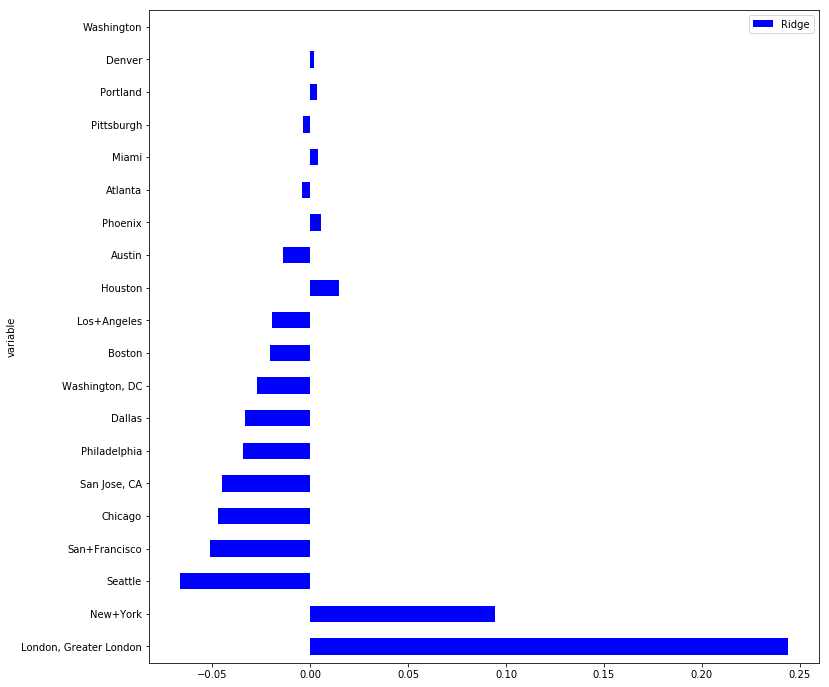

In [41]:
coefs_vars_ridge = pd.DataFrame({
    'coef': lr_ridge.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(lr_ridge.coef_[0])
})
coefs_vars_ridge.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars_ridge.plot(kind='barh',x='variable',y='coef',color='b',figsize=(12,12),label='Ridge')
plt.show()

In [42]:
#London plays the most important role among the features, which is really interesting.